<a href="https://colab.research.google.com/github/Rajandagar30/liver_disease_try/blob/main/trying_liver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT REQUIRED LIBRARIES**

In [9]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
file_path = '/content/indian_liver_patient.csv'
data = pd.read_csv(file_path)
print(data.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [11]:
print(data.shape)

(583, 11)


In [12]:
data["Result"] = data["Dataset"].replace(2,0)
data.drop('Dataset', axis = 1, inplace = True)
data.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [13]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result'],
      dtype='object')

In [14]:
data.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [15]:
data.dropna(inplace = True)
data = data[-data.duplicated(subset = None, keep='first')]

In [16]:
data.drop(data[data['Total_Bilirubin'] > 50 ].index, inplace = True)
data.drop(data[data['Direct_Bilirubin'] > 15 ].index, inplace = True)
data.drop(data[data['Alamine_Aminotransferase'] > 1500 ].index, inplace = True)
data.drop(data[data['Aspartate_Aminotransferase'] > 2000 ].index, inplace = True)
print(data.shape)

(558, 11)


<ipython-input-16-0a4128fee737>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['Total_Bilirubin'] > 50 ].index, inplace = True)
<ipython-input-16-0a4128fee737>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['Direct_Bilirubin'] > 15 ].index, inplace = True)
<ipython-input-16-0a4128fee737>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['Alamine_Aminotransferase'] > 1500 ].

In [17]:
data["Sex_Male"] = pd.get_dummies(data["Gender"], prefix = 'Sex', drop_first = True)
data.drop('Gender', axis = 1, inplace= True)

<ipython-input-17-1f71cf9c441d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex_Male"] = pd.get_dummies(data["Gender"], prefix = 'Sex', drop_first = True)
<ipython-input-17-1f71cf9c441d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Gender', axis = 1, inplace= True)


In [18]:
correlation_matrix = data.corr().round(2)
correlation_matrix['Result'].sort_values(ascending=False)

,Result
Result,1.00
Direct_Bilirubin,0.25
Total_Bilirubin,0.24
Aspartate_Aminotransferase,0.20
Alkaline_Phosphotase,0.19
Alamine_Aminotransferase,0.18
Age,0.14
Sex_Male,0.07
Total_Protiens,-0.04
Albumin,-0.16


In [19]:
X = data.drop(['Result'], axis = 1)
y = data['Result']


**over sampling**

In [20]:
no_disease = data[data['Result']== 0]
disease = data[data['Result'] == 1]

In [21]:
print(no_disease.shape, disease.shape)

(162, 11) (396, 11)


In [22]:
from imblearn.over_sampling import RandomOverSampler

In [23]:
os = RandomOverSampler(random_state = 10)

In [24]:
X_res, y_res = os.fit_resample(X,y)

In [25]:
X_res.shape, y_res.shape

((792, 10), (792,))

**RANDOM FOREST CLASSIFIER**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state=10)

In [27]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': range(80,201,5),'criterion': ['gini','entropy'], 'max_features': ['auto','sqrt','log2',None]}

In [29]:
tuning = GridSearchCV(
    estimator=RandomForestClassifier(random_state=10),
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    verbose=2,               # Show detailed progress
    n_jobs=-1,               # Use all available CPU cores
    scoring="f1",            # F1 score for binary classification
)

In [30]:
tuning.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': range(80, 201, 5)},
             scoring='f1', verbose=2)

In [31]:
tuning.best_params_ , tuning.best_score_

({'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 105},
 0.809376888587577)

In [32]:
classifier = RandomForestClassifier(n_estimators=85, criterion='gini', random_state=10,max_features="sqrt")


In [33]:
model = classifier.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [34]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train, y_train, cv=10)

**#Random Forest Classifier**

In [35]:
# Printing Maximum Accuracy
print("Maximum Accuracy: ", round(max(score) * 100, 2), "%")

# Printing Average Accuracy
print("Average Accuracy: ", round(score.mean() * 100, 2), "%")

# Printing Average Deviation (Standard Deviation)
print("Average Deviation: ", round(score.std() * 100, 2), "%")


Maximum Accuracy:  92.19 %
Average Accuracy:  83.87 %
Average Deviation:  3.98 %


In [46]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.525


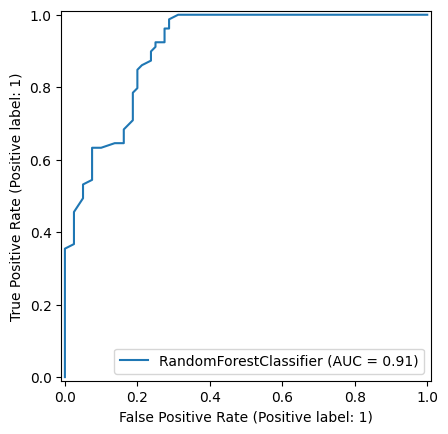

In [37]:
from sklearn.metrics import RocCurveDisplay

# Use the updated method
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))


[[65 15]
 [20 59]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        80
           1       0.80      0.75      0.77        79

    accuracy                           0.78       159
   macro avg       0.78      0.78      0.78       159
weighted avg       0.78      0.78      0.78       159



In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np  # Don't forget to import numpy

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print MSE and RMSE
print('MSE:', mse)
print('RMSE:', rmse)


MSE: 0.22012578616352202
RMSE: 0.46917564532222045


**logistic regression**

In [40]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings


# Assuming x_res, y_res are the resampled features and labels
# Split the resampled data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_tr = X_train
X_te = X_test

sc = StandardScaler()

# Fit and transform the training data
X_tr = sc.fit_transform(X_tr)

# Transform the testing data using the same scaler
X_te = sc.transform(X_te)

warnings.filterwarnings("ignore")



In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid for tuning the logistic regression model
param_grid = [
    {'max_iter': range(1, 50, 1),
     'solver': ['liblinear', 'saga', 'newton-cg', 'sag', 'lbfgs']}
]

# Initialize GridSearchCV
tuning = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, verbose=True, n_jobs=-1, scoring='f1')

# Fit the model using the training data
tuning.fit(X_train, y_train)

# Get the best parameters and score from the grid search
print("Best Parameters:", tuning.best_params_)
print("Best Score:", tuning.best_score_)

# Initialize the logistic regression model with the best parameters
model = LogisticRegression(max_iter=12, solver="newton-cg", random_state=10)

# Train the model
model.fit(X_tr, y_train)

# Make predictions using the trained model
y_pred = model.predict(X_te)

# Perform cross-validation with 10 folds
score = cross_val_score(model, X_tr, y_train, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", score)
print("Mean cross-validation score:", score.mean())


Fitting 5 folds for each of 245 candidates, totalling 1225 fits
Best Parameters: {'max_iter': 12, 'solver': 'newton-cg'}
Best Score: 0.8329402309010968
Cross-validation scores: [0.73333333 0.77777778 0.75555556 0.75555556 0.71111111 0.66666667
 0.68181818 0.68181818 0.70454545 0.68181818]
Mean cross-validation score: 0.7150000000000001


In [44]:
# Printing Maximum Accuracy
print("Maximum Accuracy: ", round(max(score) * 100, 2), "%")

# Printing Average Accuracy
print("Average Accuracy: ", round(score.mean() * 100, 2), "%")

# Printing Average Deviation (Standard Deviation)
print("Average Deviation: ", round(score.std() * 100, 2), "%")


Maximum Accuracy:  77.78 %
Average Accuracy:  71.5 %
Average Deviation:  3.65 %


In [47]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.525


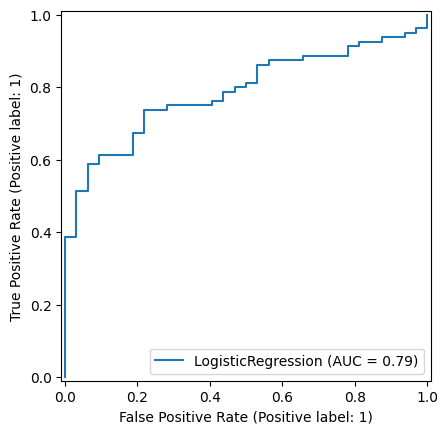

In [48]:
from sklearn.metrics import RocCurveDisplay

# Use the updated method
RocCurveDisplay.from_estimator(model, X_te, y_test)

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[ 4 28]
 [ 6 74]]
              precision    recall  f1-score   support

           0       0.40      0.12      0.19        32
           1       0.73      0.93      0.81        80

    accuracy                           0.70       112
   macro avg       0.56      0.53      0.50       112
weighted avg       0.63      0.70      0.64       112



In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np  # Don't forget to import numpy

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print MSE and RMSE
print('MSE:', mse)
print('RMSE:', rmse)


MSE: 0.30357142857142855
RMSE: 0.5509731650193397


**support vector classifier**

**KNN**

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state=10)

In [55]:
from sklearn.preprocessing import StandardScaler  # Correct import

X_tr = X_train  # Assign training data
X_te = X_test   # Assign test data

# Initialize the scaler (correct class name: StandardScaler)
sc = StandardScaler()

# Fit and transform the training data
X_tr = sc.fit_transform(X_tr)

# Transform the test data
X_te = sc.transform(X_te)


In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = [ {'n_neighbors': range(0,20,1),'algorithm': ['auto','ball_tree','kd_tree','brute'], 'weights': ['uniform','distance'], 'p': [0,1,2,3]}]

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
tuning = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    verbose=2,               # Show detailed progress
    n_jobs=-1,               # Use all available CPU cores
    scoring="f1",            # F1 score for binary classification
)

In [63]:
tuning.fit(X_tr, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': range(0, 20), 'p': [0, 1, 2, 3],
                          'weights': ['uniform', 'distance']}],
             scoring='f1', verbose=2)

In [65]:
tuning.best_params_, tuning.best_score_

({'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'},
 0.7793287249354002)

In [66]:
classifier = KNeighborsClassifier(n_neighbors = 1, p = 2, algorithm= 'auto', weights = 'uniform')
classifier.fit(X_tr, y_train)
y_pred = classifier.predict(X_te)

In [67]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_tr, y_train, cv=10)
score

array([0.796875  , 0.796875  , 0.84375   , 0.80952381, 0.84126984,
       0.82539683, 0.85714286, 0.80952381, 0.80952381, 0.77777778])

In [68]:
#KNN

In [69]:
# Printing Maximum Accuracy
print("Maximum Accuracy: ", round(max(score) * 100, 2), "%")

# Printing Average Accuracy
print("Average Accuracy: ", round(score.mean() * 100, 2), "%")

# Printing Average Deviation (Standard Deviation)
print("Average Deviation: ", round(score.std() * 100, 2), "%")

Maximum Accuracy:  85.71 %
Average Accuracy:  81.68 %
Average Deviation:  2.35 %


In [70]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.8109177215189873


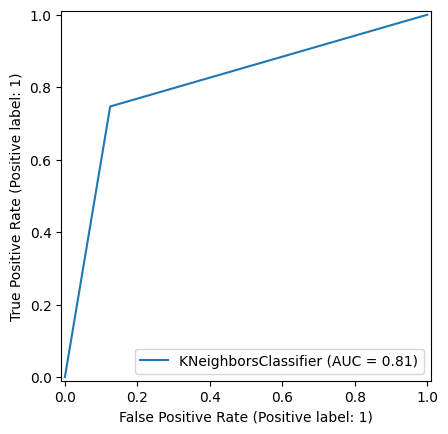

In [72]:
from sklearn.metrics import RocCurveDisplay

# Use the updated method
RocCurveDisplay.from_estimator(classifier, X_te, y_test)